# Соревнование Kaggle. Титаник

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Выгрузка и предобработка данных

### Получение информации о датасете

In [2]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

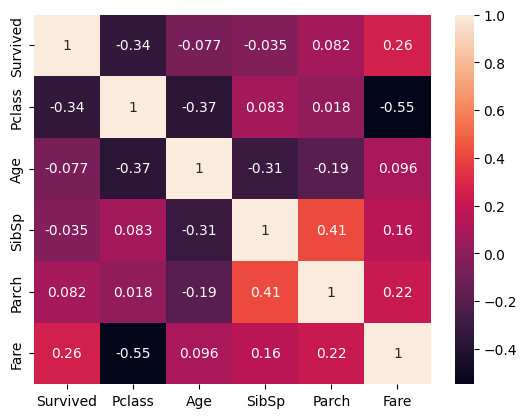

In [5]:
sns.heatmap(df.corr(), annot=True)

/var/folders/8z/38vlmcl16dx7q13yk266fs540000gn/T/ipykernel_55530/4012144024.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=20)


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

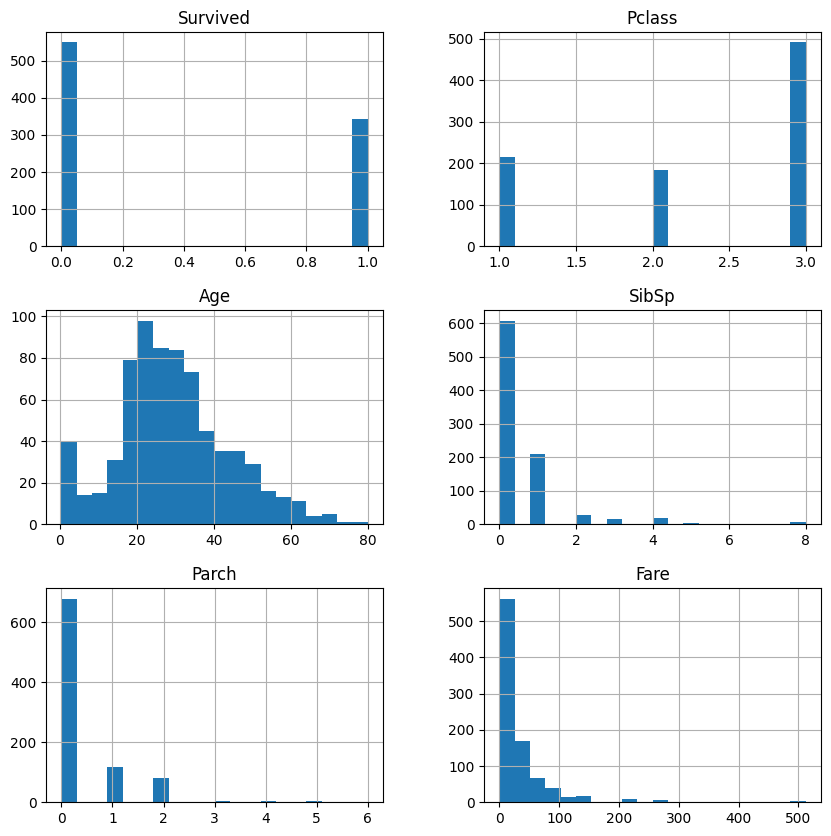

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
df.hist(ax=ax, bins=20)

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Обработка пустых значений

Найдем колонки, в которых содержатся пустые значения

In [8]:
df.columns[df.isna().sum() != 0]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Как мы видим, есть пропуски в колонках ``Age``, ``Cabin`` и ``Embarked``. Изучив данные было приняты следующие решения:
* пропущенные данные в столбце ``Age`` заменить на среднее по данной колонке
* колонку ``Cabin`` удалить, тк каюта не сильно влияет на выживаемость пассажира
* удалить строчки с пропущенными значениями в колнке ``Embarked``

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop(columns=['Cabin'])
df = df.dropna(subset=['Embarked'])

Теперь проверим количество пустых значений в каждом столбце

In [11]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Выделим матрицу фич и целевой столбец

In [12]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X.shape, y.shape

((889, 9), (889,))

### Обработка категориальных и числовых значений

In [13]:
cat_columns = X.select_dtypes(include=object).columns
num_columns = X.select_dtypes(exclude=object).columns
cat_columns, num_columns

(Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object'),
 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))

In [14]:
X[cat_columns].nunique()

Name        889
Sex           2
Ticket      680
Embarked      3
dtype: int64

Мы видим, что в колонках ``Sex`` и ``Embarked`` содержится всего 2 и 3 уникальных значения соответственно. Посмотрим, что это за значения и превратим категориальные значения в числовые

Начнем с колонки ``Sex``

In [15]:
X['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [16]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])

In [17]:
# gen = {'male' : 1,
#        'female': 0}
# X['Sex'] = X['Sex'].replace(gen)
# X['Sex'].value_counts()

Проделаем тоже самое и со столбцом ``Embarked``

In [18]:
# X['Embarked'].value_counts()

Мы видим, что возможно всего 3 возможных значения. Применим ``OneHotEncoding``

In [19]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# emb = X[['Embarked']]
# emb = ohe.fit_transform(emb)
# emb = pd.DataFrame(emb, index=X[['Embarked']].index)
# emb

Теперь удалим столбец ``Embarked`` и присоединим ``DataFrame`` полученный в результате one-hot-encoding'a

In [20]:
# X.drop(columns=['Embarked'], inplace=True)
# X = pd.concat([X, emb], axis=1)
# X

Осталось всего 2 категориальных признака ``Name`` и ``Ticket``. Номер билета и имя пассажира не влияет на выживаемость, поэтому мы их удалим

In [21]:
X = X.drop(columns=['Name', 'Ticket'])

In [22]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


In [23]:
X.select_dtypes(include=object).columns

Index([], dtype='object')

Как мы видим у нас не осталось ни одного категориального признака. Мы все их превратили в числовые признаки

### Устранение выбросов и нормализация данных

Построим box-plot, чтобы определить выбросы в датасете

In [24]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.653446,0.524184,0.382452,32.096681,0.350956,0.649044,0.188976,0.086614,0.724409
std,0.834700,12.968366,1.103705,0.806761,49.697504,0.477538,0.477538,0.391710,0.281427,0.447063
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


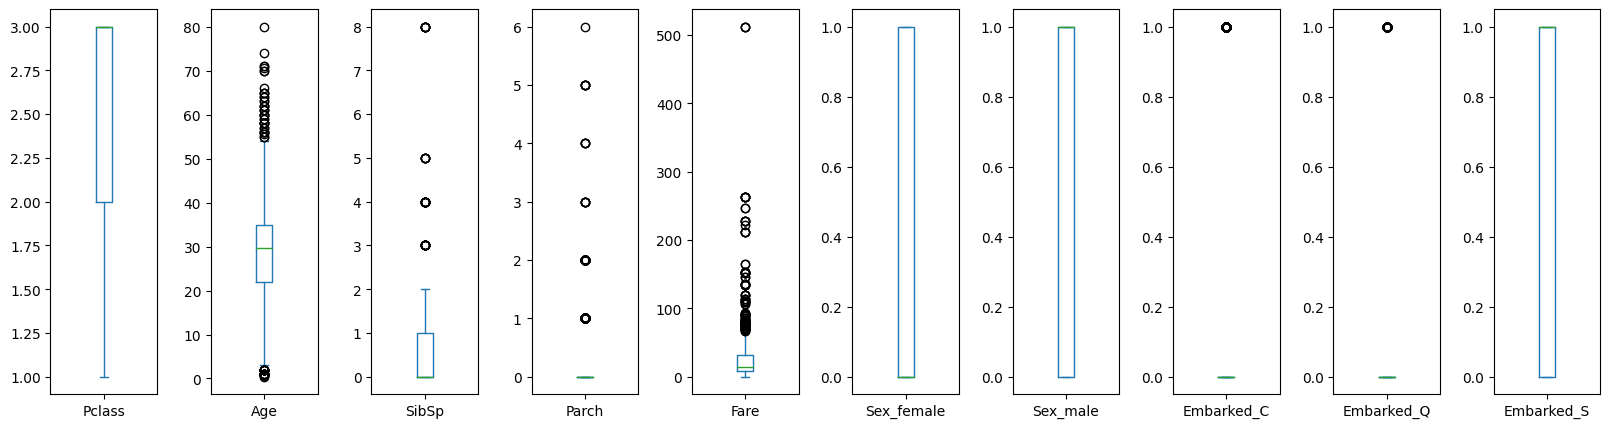

In [25]:
X.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 5)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

Как мы видим на box-plot, отдельны точки это выбросы, но они не выбиваются из логики, так что все хорошо :)

Теперь нормализуем данные использую ``StandartScaler``

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)


In [27]:
# X.shape, emb.shape

## Построение модели

In [28]:
X.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,-0.590495,0.431350,-0.474326,-0.500240,-0.735342,0.735342,-0.482711,-0.307941,0.616794
1,-1.572211,0.643971,0.431350,-0.474326,0.788947,1.359911,-1.359911,2.071634,-0.307941,-1.621287
2,0.825209,-0.281878,-0.475199,-0.474326,-0.486650,1.359911,-1.359911,-0.482711,-0.307941,0.616794
3,-1.572211,0.412509,0.431350,-0.474326,0.422861,1.359911,-1.359911,-0.482711,-0.307941,0.616794
4,0.825209,0.412509,-0.475199,-0.474326,-0.484133,-0.735342,0.735342,-0.482711,-0.307941,0.616794
5,0.825209,0.003524,-0.475199,-0.474326,-0.475913,-0.735342,0.735342,-0.482711,3.247377,-1.621287
6,-1.572211,1.878437,-0.475199,-0.474326,0.397946,-0.735342,0.735342,-0.482711,-0.307941,0.616794
7,0.825209,-2.133577,2.244449,0.765897,-0.221900,-0.735342,0.735342,-0.482711,-0.307941,0.616794
8,0.825209,-0.204724,-0.475199,2.006119,-0.422057,1.359911,-1.359911,-0.482711,-0.307941,0.616794
9,-0.373501,-1.207728,0.431350,-0.474326,-0.040787,1.359911,-1.359911,2.071634,-0.307941,-1.621287


In [29]:
y.head(10)

PassengerId
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
Name: Survived, dtype: int64

Разобъеем выборку на тренировочную и валидационную

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Для решения данной задачи воспользуемся 3 различными классификаторами: логистическая регрессия, решающее дерево и случайный лес. И воспользуемся кросс-валидацией для поиска наилучших параметров моделей

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [32]:
lr_param = {'penalty': ['l1', 'l2', 'elasticnet'],
            'C': np.linspace(0, 7, 100)}
dtc_param = {'criterion' : ['gini', 'entropy', 'log_loss'],
             'max_depth' : np.arange(3, 20),
             'min_samples_split' : np.arange(1, 10),
             'min_samples_leaf' : np.arange(1, 20)}
rfc_param = {'n_estimators': np.arange(300, 600, 25),
             'criterion' : ['entropy', 'gini'],
             'max_depth' : np.arange(3, 20)}

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
lr_grid = GridSearchCV(lr, param_grid=lr_param)
lr_grid = lr_grid.fit(X_train, y_train)
lr = lr_grid.best_estimator_
lr_grid.best_params_

{'C': 0.7070707070707071, 'penalty': 'l2'}

In [ ]:
dtc_grid = GridSearchCV(dtc, dtc_param, verbose=10)
dtc_grid = dtc_grid.fit(X_train, y_train)
dtc = dtc_grid.best_estimator_
dtc_grid.best_params_

In [ ]:
rfc_grid = GridSearchCV(rfc, rfc_param, verbose=10)
rfc_grid = rfc_grid.fit(X_train, y_train)
rfc = rfc_grid.best_estimator_
rfc_grid.best_params_

In [ ]:
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [ ]:
dtc.fit(X_train, y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

In [ ]:
rfc.fit(X_train, y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

После того, как мы обучили модели, найдем качество модели. В качестве матрики будем использовать ``accuracy``

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred_train_lr, y_train), accuracy_score(y_pred_test_lr, y_test)

(0.8135048231511254, 0.7865168539325843)

In [ ]:
accuracy_score(y_pred_train_dtc, y_train), accuracy_score(y_pred_test_dtc, y_test)

(0.8794212218649518, 0.8277153558052435)

In [ ]:
accuracy_score(y_pred_train_rfc, y_train), accuracy_score(y_pred_test_rfc, y_test)

(0.9421221864951769, 0.8127340823970037)

## Получение данных на тестовом датасете

In [ ]:
test_df = pd.read_csv('test.csv', index_col='PassengerId')
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [ ]:
test_df.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
# test_df['Sex'].replace(gen, inplace=True)

In [ ]:
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

In [ ]:
test_df.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,1,0
893,3,47.0,1,0,7.0000,1,0,0,0,1
894,2,62.0,0,0,9.6875,0,1,0,1,0
895,3,27.0,0,0,8.6625,0,1,0,0,1
896,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
# emb = test_df[['Embarked']]
# emb = ohe.fit_transform(emb)
# emb = pd.DataFrame(emb, index=test_df[['Embarked']].index)
# emb

In [ ]:
# test_df.drop(columns=['Embarked'], inplace=True)
# test_df = pd.concat([test_df, emb], axis=1)
# test_df

In [ ]:
test_df = pd.DataFrame(ss.fit_transform(test_df), columns=test_df.columns, index=test_df.index)
test_df

In [ ]:
y_pred_test_rfc_test = rfc.predict(test_df)
ans_df = pd.DataFrame(y_pred_test_rfc_test, index=test_df.index, columns=['Survived'])
ans_df.index.name = 'PassengerId'
ans_df.to_csv('pred_rfc.csv')

## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', lr),
    ('dtc', dtc),
    ('rfc', rfc)
]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
sc.fit(X_train, y_train)
y_pred_train_sc = sc.predict(X_train)
y_pred_test_sc = sc.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train_sc), accuracy_score(y_test, y_pred_test_sc)

(0.9131832797427653, 0.8314606741573034)

In [ ]:
y_pred_test_sc_test = sc.predict(test_df)
ans_df = pd.DataFrame(y_pred_test_sc_test, index=test_df.index, columns=['Survived'])
ans_df.index.name = 'PassengerId'
ans_df.to_csv('pred_sc.csv')

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(sc, n_estimators=100, n_jobs=-1)

In [ ]:
bc.fit(X_train, y_train)
y_pred_train_bc = bc.predict(X_train)
y_pred_test_bc = bc.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train_bc), accuracy_score(y_test, y_pred_test_bc)

(0.887459807073955, 0.8164794007490637)

In [ ]:
y_pred_test_bc_test = bc.predict(test_df)
ans_df = pd.DataFrame(y_pred_test_bc_test, index=test_df.index, columns=['Survived'])
ans_df.index.name = 'PassengerId'
ans_df.to_csv('pred_bc.csv')

## Catboost

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=10000,
                           depth=10, 
                           loss_function='Logloss', 
                           verbose=True)

In [ ]:
cbc.fit(X_train, y_train)
y_pred_train_cbc = cbc.predict(X_train)
y_pred_test_cbc = cbc.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train_cbc), accuracy_score(y_test, y_pred_test_cbc)

(0.9710610932475884, 0.7902621722846442)

In [ ]:
y_pred_test_cbc_test = cbc.predict(test_df)
ans_df = pd.DataFrame(y_pred_test_cbc_test, index=test_df.index, columns=['Survived'])
ans_df.index.name = 'PassengerId'
ans_df.to_csv('pred_cbc.csv')